In [1]:
#libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from math import*
from pylab import *
import random

data = pd.read_csv("classification_data1.csv")



def split(x):
    compt=0
    a,b=(len(x)*3)//4,len(x)-((len(x)*3)//4)
    training=np.zeros(a)
    testing=np.zeros(b)
    tr=0
    te=0
    while(compt<len(x)):
        if(compt%4==0):
            testing[te]=x[compt]
            te+=1
        else:
            training[tr]=x[compt]
            tr+=1
        compt+=1
    return training,testing


#splitting the data
x1_training,x1_testing=split(data.x_1)
x2_training,x2_testing=split(data.x_2)
x_training,x_testing=np.array([x1_training,x2_training]),np.array([x1_testing,x2_testing])
y_training,y_testing=split(data.y)
y_training_l,y_testing_l = split(data.y)  


#features
#we have two features x,y
print("The number of features is",len(list(data)))
print(data.keys())


#training examples
print("\nTraining examples :")
print(len(x1_training))

#testing examples
print("\nTesting examples :")
print(len(x1_testing))

#mean/median/min/max for each feature
print(data.describe())

#There is no missing data.
#This data is a supervised data.


The number of features is 3
Index(['x_1', 'x_2', 'y'], dtype='object')

Training examples :
225

Testing examples :
75
              x_1         x_2           y
count  300.000000  300.000000  300.000000
mean     3.028831    5.218191    0.500000
std      1.783472    3.992860    0.500835
min     -1.778788   -1.888312    0.000000
25%      1.541110    1.364231    0.000000
50%      2.967679    5.042328    0.500000
75%      4.521792    8.960813    1.000000
max      7.247623   11.455243    1.000000


In [2]:
#### normalization ###
def normalize_x(vect,numb):
    X = np.zeros(len(vect))
    if numb == 1 :
        for i in range (len(vect)):
            X[i] = (vect[i] - np.mean(x1_training))/ (sqrt(np.var(x1_training)))
    elif numb == 2 :
        for i in range (len(vect)):
            X[i] = (vect[i] - np.mean(x2_training))/ (sqrt(np.var(x2_training)))
    return X

x_1 = normalize_x(x_training[0],1)
x_2 = normalize_x(x_training[1],2)
x_=np.array([x_1,x_2])

x1_test = normalize_x(x_testing[0],1)
x2_test = normalize_x(x_testing[1],2)
x_test=np.array([x1_test,x2_test])


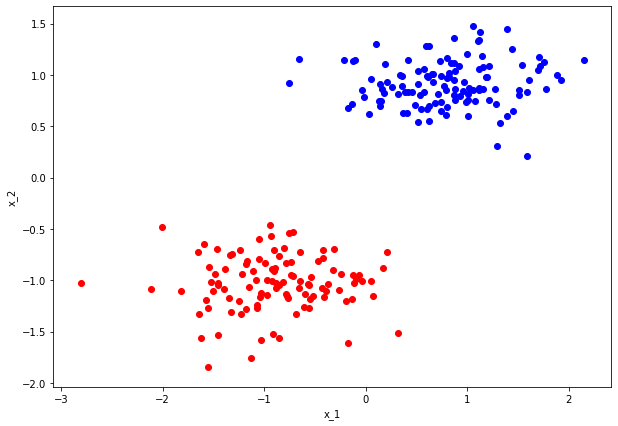

In [3]:
##### transforming data ######
for i in range (len(y_training)):
    if y_training[i] == 0:
        y_training[i] = -1


#plotting the training data
fig = plt.figure(2, figsize=(10, 7))
for i in range (len(x_1)):
    if y_training[i] == -1 :
        plt.scatter(x_[0][i], x_[1][i] ,c = 'b')
    elif y_training[i] == 1 :
        plt.scatter(x_[0][i], x_[1][i] ,c = 'red')   

        
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

Les coefficients obtenus : [ 0.         -0.86974585 -1.83265455]


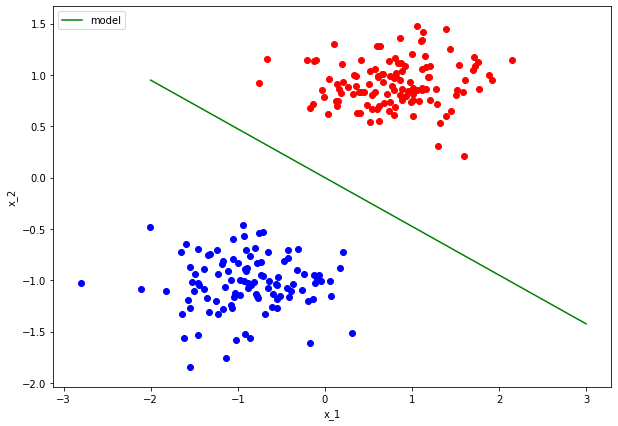

In [4]:
##### Perceptron ####
def ls(w,x,y):
    s = 0
    for i in range (len(x[0])):
        if ( (w[0] + w[1]*x[0][i] + w[2]*x[1][i]) * y[i] ) < 0:
            s += 1
    return s/len(y)



def perceptron(x,y):
    w = np.ones(3)
    t=0
    ls_ = ls(w,x,y)
    while(ls_ != 0):
        for i in range (len(x[0])):
            if ( (w[0] + w[1]*x[0][i] + w[2]*x[1][i]) * y[i]) < 0:
                w[0] += y[i]
                w[1] += y[i]*x[0][i]
                w[2] += y[i]*x[1][i]
                t += 1
        ls_ = ls(w,x,y)
    return w

    
    
w = perceptron(x_,y_training) 
print("Les coefficients obtenus :",w)

def droite(w,x1):
    return (-1/w[2]) * (w[0]+ w[1]*x1)
    
    
    
fig = plt.figure(2, figsize=(10, 7))
col = {1 :"blue", -1:"red"}
for i in range (len(x_1)):
     plt.scatter(x_1[i], x_2[i] ,color = col[y_training[i]])         
l = np.linspace(-2,3,200)
plt.plot(l,droite(w,l),color ='green',label='model')
legend(loc = 'upper left')       
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

10


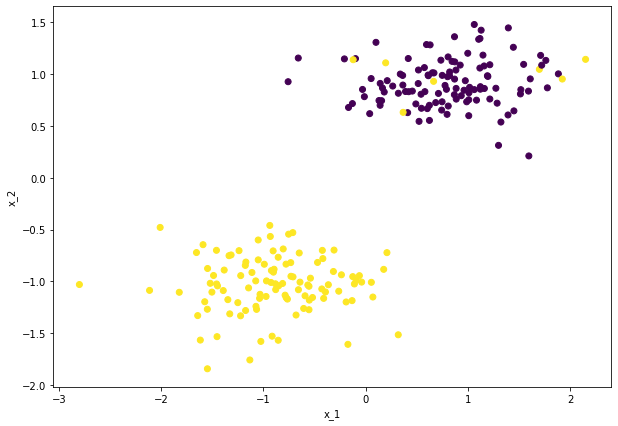

In [5]:
#### making noise on the dataset that belongs to class1 ####

####counting the number of -1 in y #####
def noise(y):
    idx = []
    Y=np.zeros(len(y))
    for i in range(len(y)):
        if (y[i] == 0) :
            idx.append(i)

    print((len(idx)*7)//100)
    ##### making noise ####
    for i in range(len(Y)):
        Y[i] = y[i]
    for i in range((len(idx)*7)//100):
        r = random.randint(0, len(idx))
        Y[idx[r]]=1
            
    return Y

y=data.y.to_numpy()
n=noise(y) 


## splitting###
y_training,y_testing=split(n)
y_training_l,y_testing_l=split(n)

for i in range (len(y_training)):
    if y_training[i] == 0:
        y_training[i] = -1

fig = plt.figure(2, figsize=(10, 7))
plt.scatter(x_[0], x_[1] ,c = y_training_l)              
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


In [6]:
##### Adaline ####

#### compute Ls ####
def Ls(w,y,x):
    ls = 0
    for i in range(len(y)):
        ls = sum((y - (w[0] + w[1]*x[0] + w[2]*x[1]))**2 )
    return ls/len(y)

def signe(w,x1,x2):
    e = w[0] + w[1]*x1 + w[2]*x2
    if e >= 0 :
        return 1
    else :
        return -1
        

##### Adaline learning algorithm ####
def adaline(y,x,Tmax):
    w = np.ones(3)
    for t in range (1,Tmax):
        for i in range (len(y)):
            s = signe(w,x[0][i],x[1][i])
            e = y[i] - s
            if (e != 0) :
                w[0] += 2*e
                w[1] += 2*e*x[0][i]
                w[2] += 2*e*x[1][i]
    print(Ls(w,y,x))
    return w

w1 = adaline(y_training,x_,2000)


87.1372296255401
[ 1.         -0.25400004 -9.96933786]


Les coefficients obtenus : [ 1.         -0.25400004 -9.96933786]


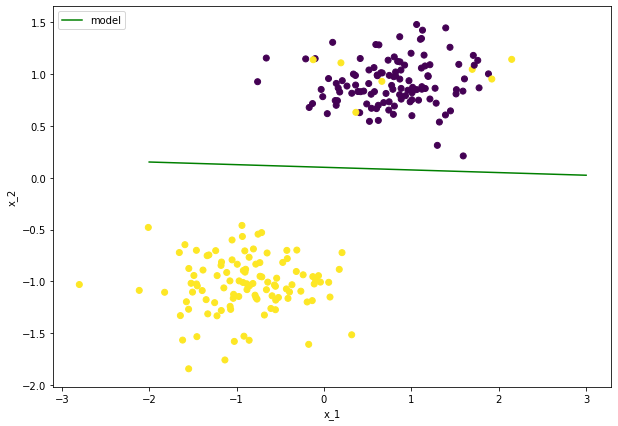

In [7]:
####### Plot Adaline ######
print("Les coefficients obtenus :",w1)
fig = plt.figure(2, figsize=(10, 7))
col = {1 :"blue", -1:"red"}
plt.scatter(x_[0], x_[1] ,c = y_training)         
l = np.linspace(-2,3,200)
plt.plot(l,droite(w1,l),color ='green',label='model')
legend(loc = 'upper left')       
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [29]:
###### Pocket #####

def Pocket(x,y):
    ws = np.ones(3)
    w = np.ones(3)
    for t in range(1,1000):
        for i in range (len(y)):
            if ( (w[0] + w[1]*x[0][i] + w[2]*x[1][i])*y[i] < 0):
                w[0] += y[i]
                w[1] += y[i]*x[0][i]
                w[2] += y[i]*x[1][i]      
        if ( ls(w,x,y) < ls(ws,x,y) ):
            ws = w
    return ws


In [30]:
w=Pocket(x_,y_training)
print(w)

[ 0.         -0.29946096 -2.92190134]


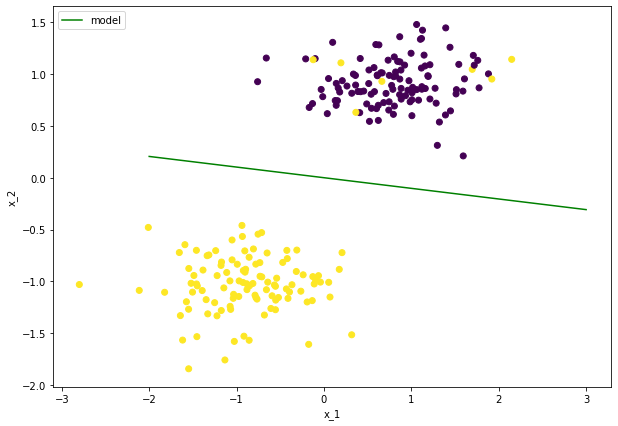

In [10]:

###### Plot pocket #####
fig = plt.figure(2, figsize=(10, 7))
col = {1 :"blue", -1:"red"}
plt.scatter(x_[0], x_[1] ,c = y_training)         
l = np.linspace(-2,3,200)
plt.plot(l,droite(w,l),color ='green',label='model')
legend(loc = 'upper left')       
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [31]:
###### Logistic regression #######

def sigmoid(z):
    return 1/(1+np.exp(-z))



def hypothesis(x1,x2,w):
    return sigmoid( w[0] + w[1]*x1 + w[2]*x2 )



def gradient(x,w,y,param):
    grad = 0
    if param == 0:
        grad = sum(hypothesis(x[0],x[1],w) - y)
    elif param == 1 :
        grad = sum( (hypothesis(x[0],x[1],w) - y)* x[0])
    elif param == 2:
        grad = sum( (hypothesis(x[0],x[1],w) - y)* x[1])
    return grad*(1/len(y))
    
    
    
def cost_function(x,y,w):
    err = 0
    errs = 0
    for i in range(len(y)):
        if y[i] == 1 :
            err = -y[i]*log(hypothesis(x[0][i],x[1][i],w))
        elif y[i] == 0 :
            err = -(1-y[i])*log(1 - hypothesis(x[0][i],x[1][i],w))            
        errs += err
    return (1/len(y))*errs


def gradient_descent(x,y,rate,precision):
    w = np.ones(3) 
    d=np.array([[gradient(x,w,y,0)],[gradient(x,w,y,1)],[gradient(x,w,y,2)]])
    while(np.linalg.norm(d) > precision):
        w[0] -= rate*gradient(x,w,y,0)
        w[1] -= rate*gradient(x,w,y,1)
        w[2] -= rate*gradient(x,w,y,2)
        d[0] = gradient(x,w,y,0)
        d[1] = gradient(x,w,y,1)
        d[2] = gradient(x,w,y,2)
    return w



def predict(x,w):
    targets = np.zeros(len(y_testing))
    for i in range (len(y_testing)):
        if hypothesis(x[0][i],x[1][i],w) >= 0.5:
            targets[i] = 1
        elif hypothesis(x[0][i],x[1][i],w) < 0.5:
            targets[i] = 0
    return targets

def predict_(x,w,y):
    targets = np.zeros(len(y))
    for i in range (len(y)):
        if hypothesis(x[0][i],x[1][i],w) >= 0.5:
            targets[i] = 1
        elif hypothesis(x[0][i],x[1][i],w) < 0.5:
            targets[i] = 0
    return targets

w2 = gradient_descent(x_,y_training_l,0.01,0.01)



Les coefficients obtenus : [ 0.46252389 -1.07454102 -2.7002347 ]


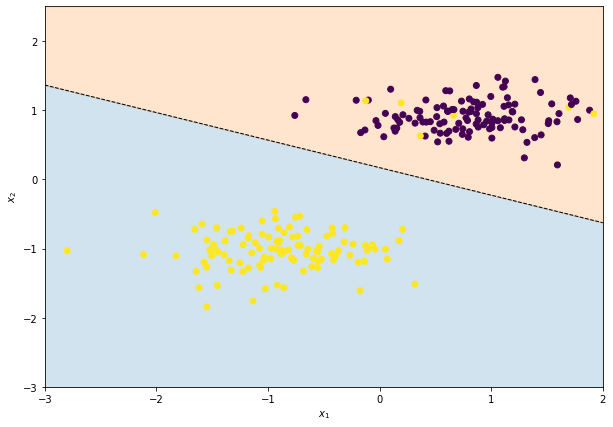

In [32]:
print("Les coefficients obtenus :",w2)

###### Plot Logistic Regression #####
# Calculate the intercept and gradient of the decision boundary.
c = -w2[0]/w2[2]
m = -w2[1]/w2[2]
fig = plt.figure(2, figsize=(10, 7))
# Plot the data and the classification with the decision boundary.
xmin, xmax = -3, 2
ymin, ymax = -3, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)


col = {1 :"blue", -1:"red"}
plt.scatter(x_[0], x_[1] ,c = y_training) 
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

In [33]:
#### error
def Loss(w,y,x):
    ls = 0
    for i in range(len(y)):
        if(predict_(x,w,y)[i]!=y[i]):
            ls+=1
    return ls/len(y)

In [34]:
Loss(w2,y_training_l,x_)

0.03111111111111111

In [35]:
### generalisation error 
print("The generalization error :",Loss(w2,y_testing_l,x_test))

The generalization error : 0.013333333333333334


In [36]:
###### regularisation
def gradient_descent_reg(x,y,rate,precision,lam):
    w = np.zeros(3) 
    d=np.array([[gradient(x,w,y,0)],[gradient(x,w,y,1)],[gradient(x,w,y,2)]])
    while(np.linalg.norm(d) > precision):
        #print(np.linalg.norm(d))
        d[0] = gradient(x,w,y,0)+lam*w[0]
        d[1] = gradient(x,w,y,1)+lam*w[1]
        d[2] = gradient(x,w,y,2)+lam*w[2]
        w[0] -= rate*d[0]
        w[1] -= rate*d[1]
        w[2] -= rate*d[2]
        #print("hello")
    return w

In [25]:
print(w2)
w3=gradient_descent_reg(x_,y_training_l,0.01,0.01,0.05)
print(w3)

[ 0.46252389 -1.07454102 -2.7002347 ]
[ 0.06301077 -0.91020507 -1.39180871]


In [27]:
Loss(w3,y_testing_l,x_test)

0.013333333333333334